<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 6</span>
# <span style="color:green">Network Communities

#### Computing and comparing network communities using two algorithms (Leuven and Leiden) with Python’s NetworkX through the following template.

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import string
import random
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from IPython.display import Markdown as md 
import community
import leidenalg
import igraph as ig

In [2]:
def ccomp(A,B):
    eds=[]
    A1=set(A.keys())
    B1=set(B.keys())
    for i in A1:
        x=set(A[i])
        for j in B1:
            y=set(B[j])
            sd=sorted(list(x.symmetric_difference(y)))
            ss=sorted(list(set(list(x)+list(y))))
            if A[i]==B[j]:
                eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),1.))
            else:
                if len(sd)/float(len(ss))==1:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),0.))
                else:
                    eds.append(("louvain_comm_"+str(i),"leiden_comm_"+str(j),len(sd)/float(len(ss))))
    H = nx.Graph()
    H.add_weighted_edges_from(eds)
    H.remove_edges_from([e for e in H.edges(data=True) if e[2]['weight']==0.])       
    return H

In [3]:
name="Karate Club graph"
G=nx.karate_club_graph()
G=nx.Graph(G,name=name)

In [4]:
md("## 1. The %s"%(name))

## 1. The Karate Club graph

Graph G is a Karate Club graph with 34 nodes and 78 edges



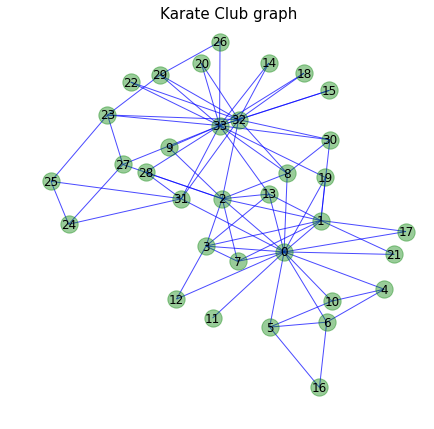

In [5]:
print "Graph G is a %s with %i nodes and %i edges\n" %(str(G),len(G.nodes()),len(G.edges()))

pos=graphviz_layout(G)
plt.figure(figsize=(7,7));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,arrowsize=20, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name,fontsize=15);

In [6]:
md("### 1.1 Louvain communities of the %s"%(name))

### 1.1 Louvain communities of the Karate Club graph

The graph has 4 Louvain communities and modularity coefficient equal to 0.418803418803
Community 0 with 12 nodes: [0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21]
Community 1 with 11 nodes: [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Community 2 with 6 nodes: [23, 24, 25, 27, 28, 31]
Community 3 with 5 nodes: [4, 5, 6, 10, 16]


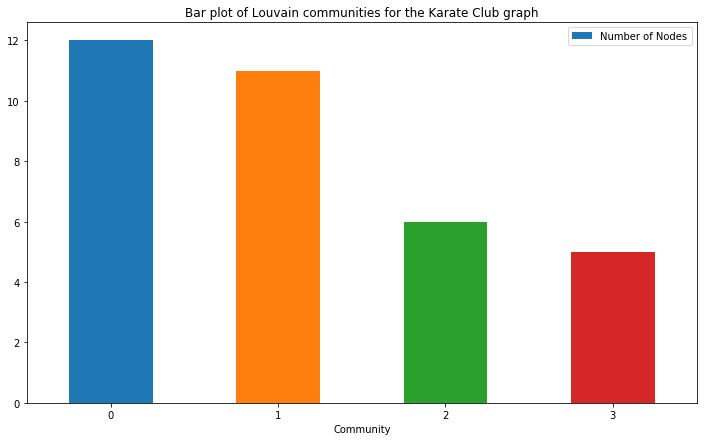

In [7]:
partition = community.best_partition(G)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, G, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Louvain communities for the %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

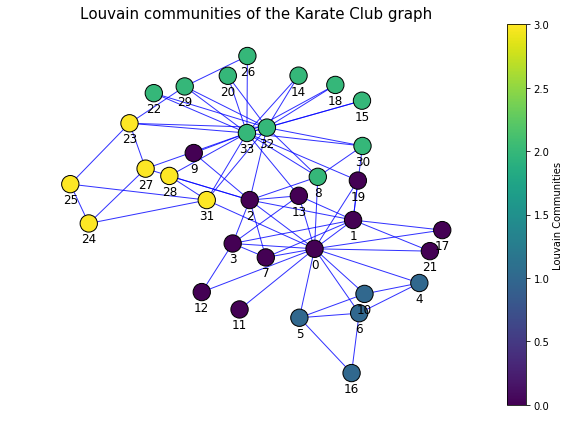

In [8]:
node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(10,7));
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -20 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of the %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [9]:
md("### 1.2 Leiden communities of the %s"%(name))

### 1.2 Leiden communities of the Karate Club graph

The graph has 4 Louvain communities and modularity coefficient equal to 0.418803418803
Community 0 with 12 nodes: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Community 1 with 11 nodes: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Community 2 with 6 nodes: [23, 24, 25, 27, 28, 31]
Community 3 with 5 nodes: [4, 5, 6, 10, 16]


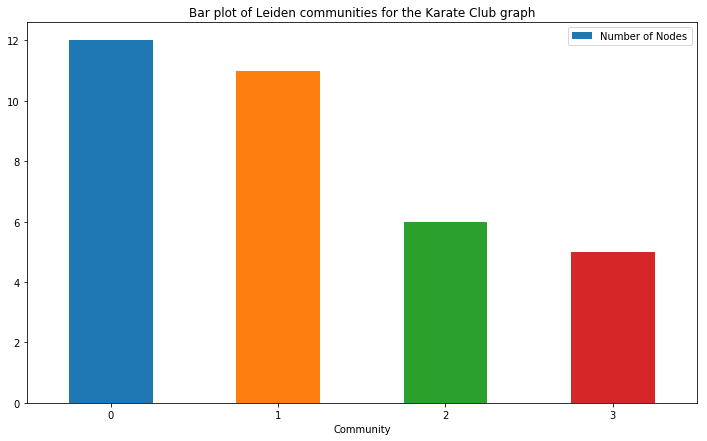

In [10]:
g = ig.Graph(directed=False)
g.add_vertices(G.nodes())
g.add_edges(G.edges())

partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition);
# partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition, weights=’weight’);

kk=len(list(partition))
partd={}
for i,j in list(enumerate(cml)):
    for jj in j:
        partd[jj]=i
modularity=community.modularity(partd, G, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity

cml=list(partition)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
leiden_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    leiden_comm_membership[i[0]]=ts 
    
ddf=pd.DataFrame(commsd.items(), columns=['Community', 'Number of Nodes'])
sst="Bar plot of Leiden communities for the %s" %name
ddf.plot.bar(x='Community', y='Number of Nodes', figsize=(12,7),rot=0,title=sst);

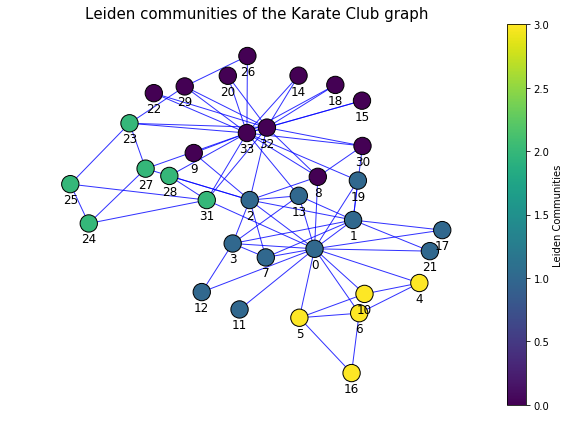

In [11]:
partd={}
for i,j in list(enumerate(cml)):
    for jj in j:
        partd[jj]=i

node_color=partd.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(10,7));
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.8)
plt.axis('off');
yoffset = {}
y_off = -20 #-0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Leiden Communities") #, orientation='horizontal')
sst="Leiden communities of the %s" %name
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

In [12]:
md("### 1.3 Comparison/similarities of Louvain-Leiden communities for the %s" %name)

### 1.3 Comparison/similarities of Louvain-Leiden communities for the Karate Club graph

In [13]:
H=ccomp(louvain_comm_membership,leiden_comm_membership)

posbp={}
louvain=sorted([n for n in H.nodes() if "louvain" in n])
leiden=sorted([n for n in H.nodes() if "leiden" in n])
for n in H.nodes():
    for i,j in list(enumerate(louvain)):
        posbp[j]=(0,i)
    for i,j in list(enumerate(leiden)):
        posbp[j]=(1,i)
# elabels={}
# elabels = nx.get_edge_attributes(H,'weight')
# elabelsc={}
# for k,v in elabels.items():
#     elabelsc[k]='%.02f' %v 
# elabels=elabelsc
lo=[]
le=[]
we=[]
for e in H.edges(data=True):
    if 'louvain' in e[0]:
        lo.append(e[0])
        le.append(e[1])
        we.append(e[2]['weight'])
    else:
        le.append(e[0])
        lo.append(e[1])
        we.append(e[2]['weight'])
edf=pd.DataFrame(
    {'Louvain':lo,
     'Leiden':le,
     'Similarity':we})
edf=edf[['Louvain','Leiden','Similarity']]
edf.sort_values("Similarity", inplace=True,ascending=False)
edf

,Louvain,Leiden,Similarity
0,louvain_comm_2,leiden_comm_2,1.000000
1,louvain_comm_3,leiden_comm_3,1.000000
2,louvain_comm_0,leiden_comm_0,0.956522
3,louvain_comm_1,leiden_comm_0,0.083333
4,louvain_comm_0,leiden_comm_1,0.083333


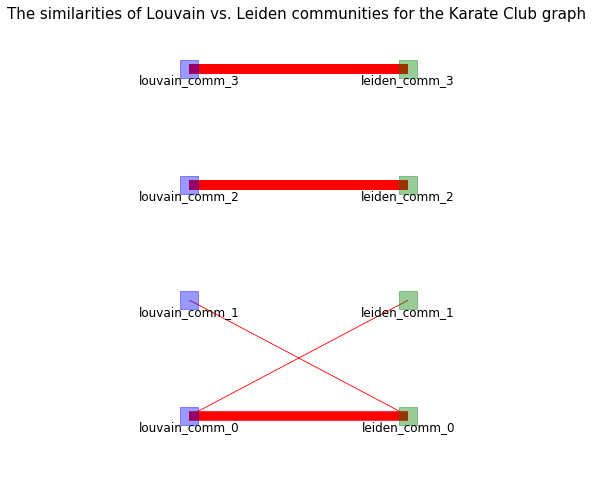

In [14]:
edge_width=[e[2]['weight'] for e in H.edges(data=True)]
edge_width=[10*w for w in edge_width]
plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(H, posbp, nodelist=louvain,node_color="b",node_shape='s',alpha=0.4)
nodes2 = nx.draw_networkx_nodes(H, posbp, nodelist=leiden,node_color="g",node_shape='s',alpha=0.4)
nx.draw_networkx_edges(H, posbp, edge_color="r",width=edge_width, alpha=1.)
# nx.draw_networkx_edge_labels(H,posbp,edge_labels=elabels,label_pos = 0.4);
plt.axis('off');
yoffset = {}
y_off = -0.1  # offset on the y axis
for k, v in posbp.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(H, yoffset);
plt.margins(x=0.5, y=0.1)
sst="The similarities of Louvain vs. Leiden communities for the %s" %name
plt.title(sst,fontsize=15);

In [15]:
sim1=[]
sim2=[]
sim3=[]
for e in H.edges(data=True):
    if e[2]['weight']==1:
        sim1.append(e)
    if e[2]['weight']<1 and e[2]['weight']>=0.5:
        sim2.append(e)
    if e[2]['weight']<0.5 and e[2]['weight']>0:
        sim3.append(e)
print "There are %i pairs of completely similar communities" %len(sim1)
print "There are %i pairs of communities having percentage of identical nodes >=50%% and <100%%" %len(sim2)
print "There are %i pairs of communities having percentage of identical nodes <50%% and >0%%" %len(sim3)

There are 2 pairs of completely similar communities
There are 1 pairs of communities having percentage of identical nodes >=50% and <100%
There are 2 pairs of communities having percentage of identical nodes <50% and >0%


In [16]:
name="Erdos-Renyi random graph"
nodes=random.randint(32,37)
p=random.uniform(0.05,0.08)
while True:
    G=nx.erdos_renyi_graph(nodes,p)
    if nx.number_of_isolates(G)==0:
        break
G=nx.Graph(G,name=name)

In [17]:
md("## 2. %s"%(name))

## 2. Erdos-Renyi random graph

In [18]:
# Copy, paste and run cell 5 here:


In [19]:
md("### 2.1 Louvain communities of the %s"%(name))

### 2.1 Louvain communities of the Erdos-Renyi random graph

In [20]:
# Copy, paste and run cell 7 here:


In [21]:
# Copy, paste and run cell 8 here:
# You may need to adjust the value of y_off so that node labels are properly located


In [22]:
md("### 2.2 Leiden communities of the %s"%(name))

### 2.2 Leiden communities of the Erdos-Renyi random graph

In [23]:
# Copy, paste and run cell 10 here:


In [24]:
# Copy, paste and run cell 11 here:
# You may need to adjust the value of y_off so that node labels are properly located


In [25]:
md("### 2.3 Comparison/similarities of Louvain-Leiden communities for the %s" %name)

### 2.3 Comparison/similarities of Louvain-Leiden communities for the Erdos-Renyi random graph

In [26]:
# Copy, paste and run cell 13 here:


In [27]:
# Copy, paste and run cell 14 here:


In [28]:
# Copy, paste and run cell 15 here:


In [29]:
name="Strogatz-Watts Small-World graph"
nodes=random.randint(32,37)
k=random.randint(3,6) #Each node is joined with its k nearest neighbors in a ring topology
p=random.uniform(0.7,0.8) #rewiring probability
while True:
    G=nx.watts_strogatz_graph(nodes, k, p)
    if nx.number_of_isolates(G)==0:
        break
G=nx.Graph(G,name=name)

In [30]:
md("## 3. %s"%(name))

## 3. Strogatz-Watts Small-World graph

In [31]:
# Copy, paste and run cell 5 here:


In [32]:
md("### 3.1 Louvain communities of the %s"%(name))

### 3.1 Louvain communities of the Strogatz-Watts Small-World graph

In [33]:
# Copy, paste and run cell 7 here:


In [34]:
# Copy, paste and run cell 8 here:
# You may need to adjust the value of y_off so that node labels are properly located


In [35]:
md("### 3.2 Leiden communities of the %s"%(name))

### 3.2 Leiden communities of the Strogatz-Watts Small-World graph

In [36]:
# Copy, paste and run cell 10 here:


In [37]:
# Copy, paste and run cell 11 here:
# You may need to adjust the value of y_off so that node labels are properly located


In [38]:
md("### 3.3 Comparison/similarities of Louvain-Leiden communities for the %s" %name)

### 3.3 Comparison/similarities of Louvain-Leiden communities for the Strogatz-Watts Small-World graph

In [39]:
# Copy, paste and run cell 13 here:


In [40]:
# Copy, paste and run cell 14 here:


In [41]:
# Copy, paste and run cell 15 here:


In [42]:
name="Barabasi-Albert Preferential Attachment graph"
n=random.randint(40,50) #no of nodes
m=random.randint(3,6) #Number of edges to attach from a new node to existing nodes
G=nx.barabasi_albert_graph(n, m)
# while True:
#     G=nx.barabasi_albert_graph(n, m)
#     if nx.number_of_isolates(G)==0:
#         break
G=nx.Graph(G,name=name)

In [43]:
md("## 4. %s"%(name))

## 4. Barabasi-Albert Preferential Attachment graph

In [44]:
# Copy, paste and run cell 5 here:


In [45]:
md("### 4.1 Louvain communities of the %s"%(name))

### 4.1 Louvain communities of the Barabasi-Albert Preferential Attachment graph

In [46]:
# Copy, paste and run cell 7 here:


In [47]:
# Copy, paste and run cell 8 here:
# You may need to adjust the value of y_off so that node labels are properly located


In [48]:
md("### 4.2 Leiden communities of the %s"%(name))

### 4.2 Leiden communities of the Barabasi-Albert Preferential Attachment graph

In [49]:
# Copy, paste and run cell 10 here:


In [50]:
# Copy, paste and run cell 11 here:
# You may need to adjust the value of y_off so that node labels are properly located


In [51]:
md("### 4.3 Comparison/similarities of Louvain-Leiden communities for the %s" %name)

### 4.3 Comparison/similarities of Louvain-Leiden communities for the Barabasi-Albert Preferential Attachment graph

In [52]:
# Copy, paste and run cell 13 here:


In [53]:
# Copy, paste and run cell 14 here:


In [54]:
# Copy, paste and run cell 15 here:
